In [1]:
#imports
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import ticker
import numpy as np
import pandas as pd
import seaborn as sns
import os
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split 

## Data Recovery

In [2]:
data = pd.read_csv('data_complete.csv', index_col = 0, parse_dates=['days'])
data_h = pd.read_csv('data_hour.csv', index_col = 0)

In [3]:
data

,Electricity demand,production_nette,production stock,index,Stored phs,Stored battery,Stored methanation,days,cost_phs,cost_bat,cost_met,cost,Stored24phs,Stored24battery,Stored24methanation,stock_day_phs,stock_day_battery,stock_day_methanation
0,822.34,-238.12,244.84,0,100.000000,100.000000,80.483619,1,0.000608,0.003235,0.003928,77.705064,100.000000,0.000000,77.484681,0.000000,-100.000000,-2.998938
1,1011.52,-230.66,253.92,24,100.000000,0.000000,77.484681,2,0.000608,0.003087,0.004208,79.031328,91.461111,0.000000,73.569996,-8.538889,0.000000,-3.914685
2,1429.34,40.22,114.61,48,91.461111,0.000000,73.569996,3,0.000608,0.003182,0.003103,68.930476,88.772222,35.554357,73.343739,-2.688889,35.554357,-0.226256
3,1476.76,-25.91,162.37,72,88.772222,35.554357,73.343739,4,0.000608,0.003113,0.003438,71.594721,81.144444,100.000000,71.943798,-7.627778,64.445643,-1.399942
4,1464.01,-233.79,284.44,96,81.144444,100.000000,71.943798,5,0.000608,0.003112,0.004489,82.088458,100.000000,100.000000,67.112806,18.855556,0.000000,-4.830992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6564,1395.76,-70.92,124.39,157536,71.872222,71.216617,86.169233,360,0.000608,0.003087,0.003327,70.220758,56.366667,78.041543,85.131638,-15.505556,6.824926,-1.037596
6565,1387.42,13.67,90.03,157560,56.366667,78.041543,85.131638,361,0.000608,0.003087,0.003486,71.809862,100.000000,100.000000,83.575204,43.633333,21.958457,-1.556433
6566,1421.66,-169.79,169.77,157584,100.000000,100.000000,83.575204,362,0.000608,0.003107,0.003430,71.457317,48.972222,86.080388,82.201024,-51.027778,-13.919612,-1.374180
6567,1401.63,-178.55,254.32,157608,48.972222,86.080388,82.201024,363,0.000608,0.003172,0.003719,74.990028,31.444444,42.230914,79.885016,-17.527778,-43.849474,-2.316009


In [4]:
#passage en pourcentage
stor = ["phs","battery","methanation"]
volume= pd.Series([180 ,74.14, 12499.09], index = stor)

data_h["Stored phs"] = data_h["Stored phs"]/volume['phs']*100
data_h["Stored battery"] = data_h["Stored battery"]/volume['battery']*100
data_h["Stored methanation"] = data_h["Stored methanation"]/volume['methanation']*100
data_h

,offshore,onshore,pv,river,lake,biogas,phs,battery,methanation,Stored phs,Stored battery,Stored methanation,Electricity demand
0,5.82,15.78,0.0,1.27,0.0,0.0,0.0,0.0,5.82,100.000000,100.0,80.483619,28.69
1,5.74,16.61,0.0,1.30,0.0,0.0,0.0,0.0,7.56,100.000000,100.0,80.380092,31.21
2,5.61,17.10,0.0,1.11,0.0,0.0,0.0,0.0,3.88,100.000000,100.0,80.245602,27.70
3,5.64,17.78,0.0,1.12,0.0,0.0,0.0,0.0,3.45,100.000000,100.0,80.176637,27.99
4,5.72,18.42,0.0,1.21,0.0,0.0,0.0,0.0,2.81,100.000000,100.0,80.115272,28.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157675,5.11,32.99,0.0,2.79,13.0,0.0,0.0,0.0,0.00,76.333333,100.0,80.446577,38.61
157676,4.17,30.48,0.0,2.72,13.0,0.0,0.0,0.0,0.00,81.244444,100.0,80.474819,39.34
157677,3.19,27.04,0.0,2.45,13.0,0.0,0.0,0.0,0.00,86.150000,100.0,80.482979,36.71
157678,2.43,23.58,0.0,2.24,13.0,0.0,0.0,0.0,0.00,90.888889,100.0,80.482979,33.29


In [5]:
data['2diff'] = data.stock_day_methanation[1:].reset_index(drop=True) - data.stock_day_methanation[:-1].reset_index(drop=True)

## Work on stock level at the end of the day

Preparatory step before you develop a forecast.

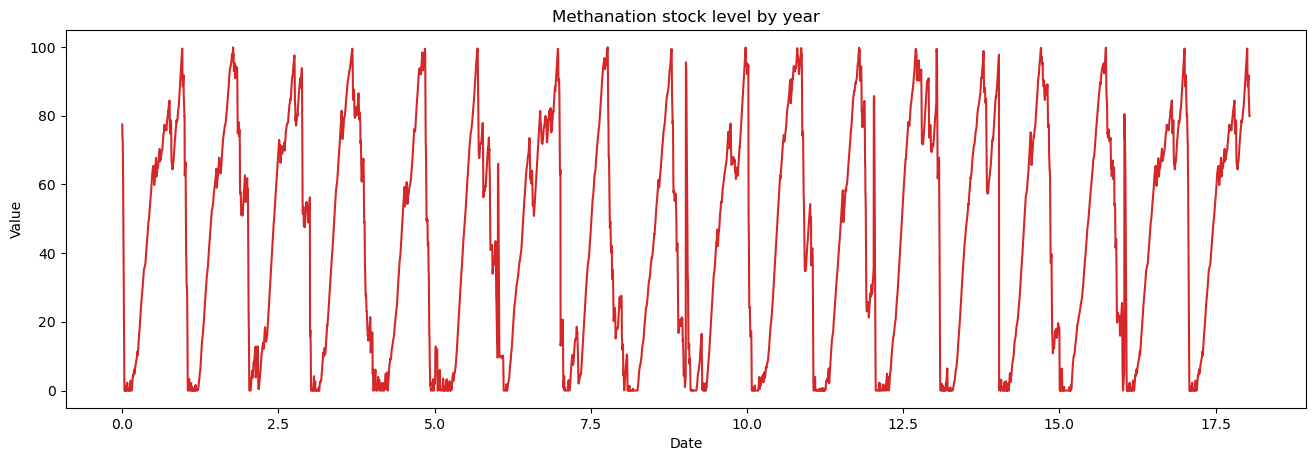

In [6]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()  

plot_df(data, x=data.index/364, y=data.Stored24methanation, title='Methanation stock level by year') 

We can see a repetitive patern.

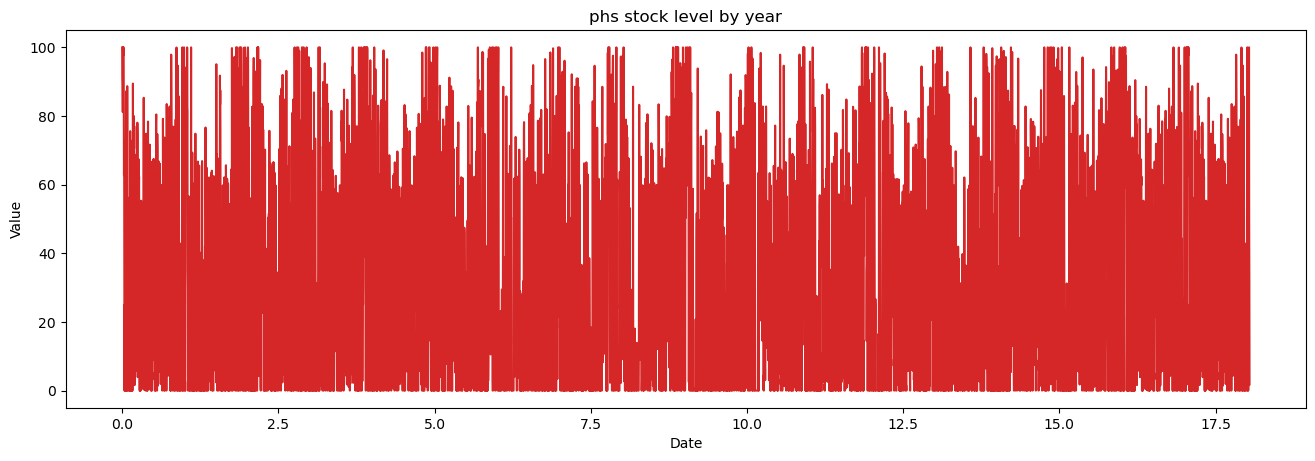

In [7]:

plot_df(data, x=data.index/364, y=data.Stored24phs, title='phs stock level by year') 

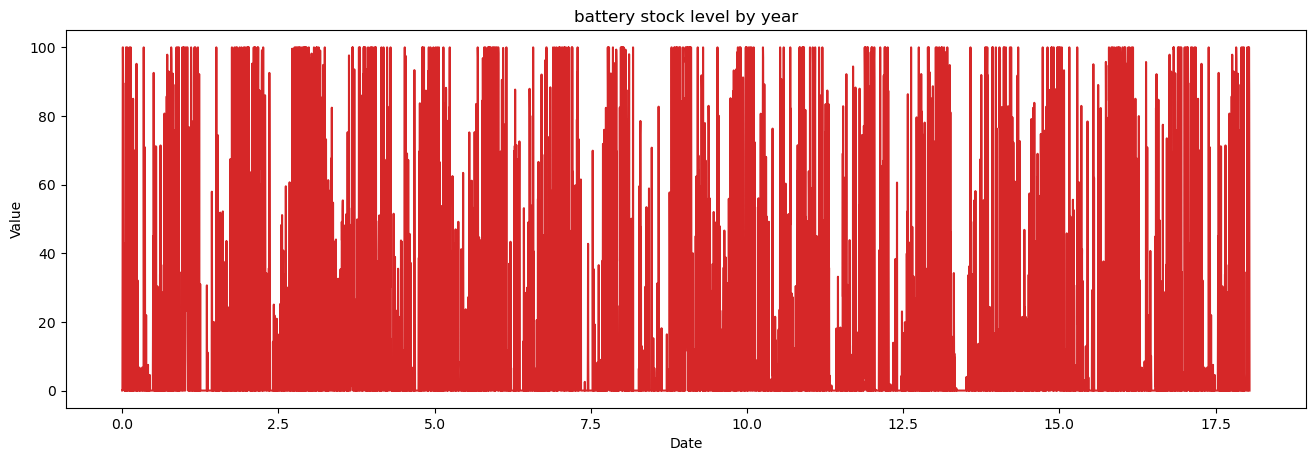

In [8]:

plot_df(data, x=data.index/364, y=data.Stored24battery, title='battery stock level by year') 

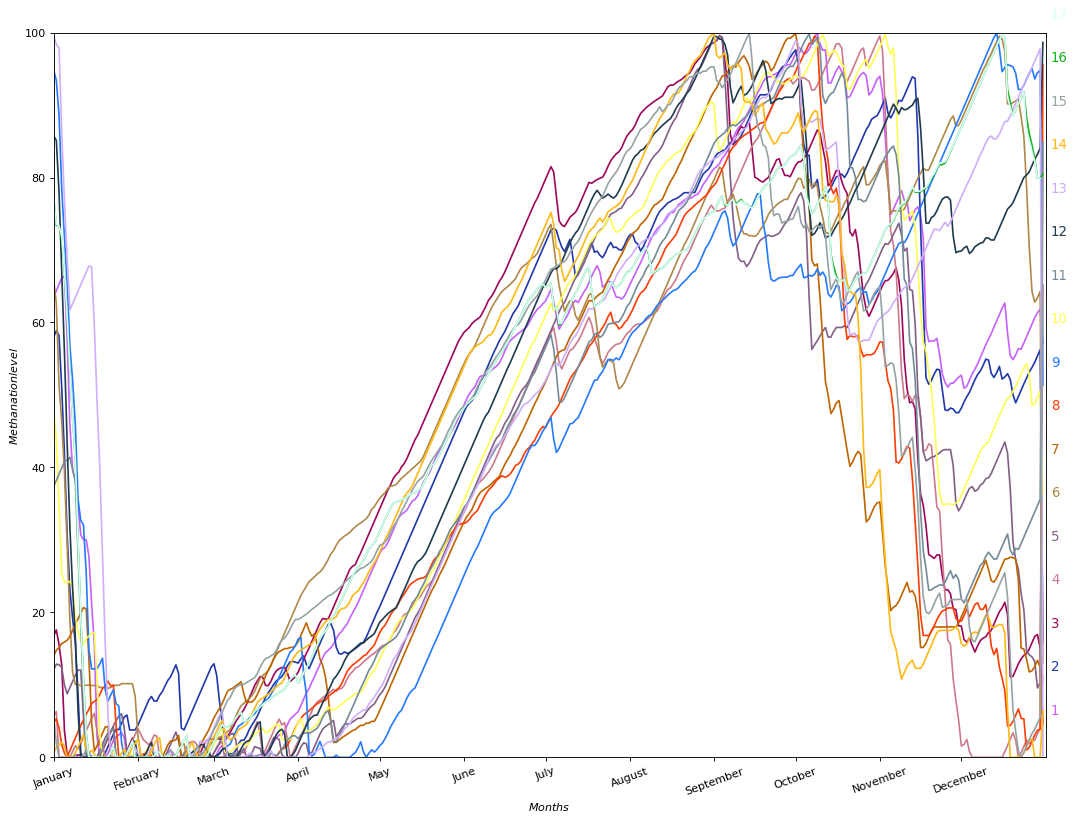

In [9]:
import matplotlib as mpl
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), 18, replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i in range(18):
    if i > 0:        
        plt.plot('days', 'Stored24methanation', data=data.loc[data.index // 365 == i], color=mycolors[i])
        plt.text(367, 6*i, i, fontsize=12, color=mycolors[i])

plt.gca().set(xlim=(0, 365), ylim=(0, 100), ylabel='$Methanation level$', xlabel='$Months$')

plt.xticks([0,31,31 +28, 2*31 +28, 2*31+28 + 30, 3*31 +30 + 28, 3*31+2*30 + 28,4*31+2*30 + 28,5*31+2*30 + 28, 5*31+3*30 + 28,6*31+3*30 + 28, 6*31+4*30 + 28], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
       rotation=20)  # Set text labels and properties.
plt.show()


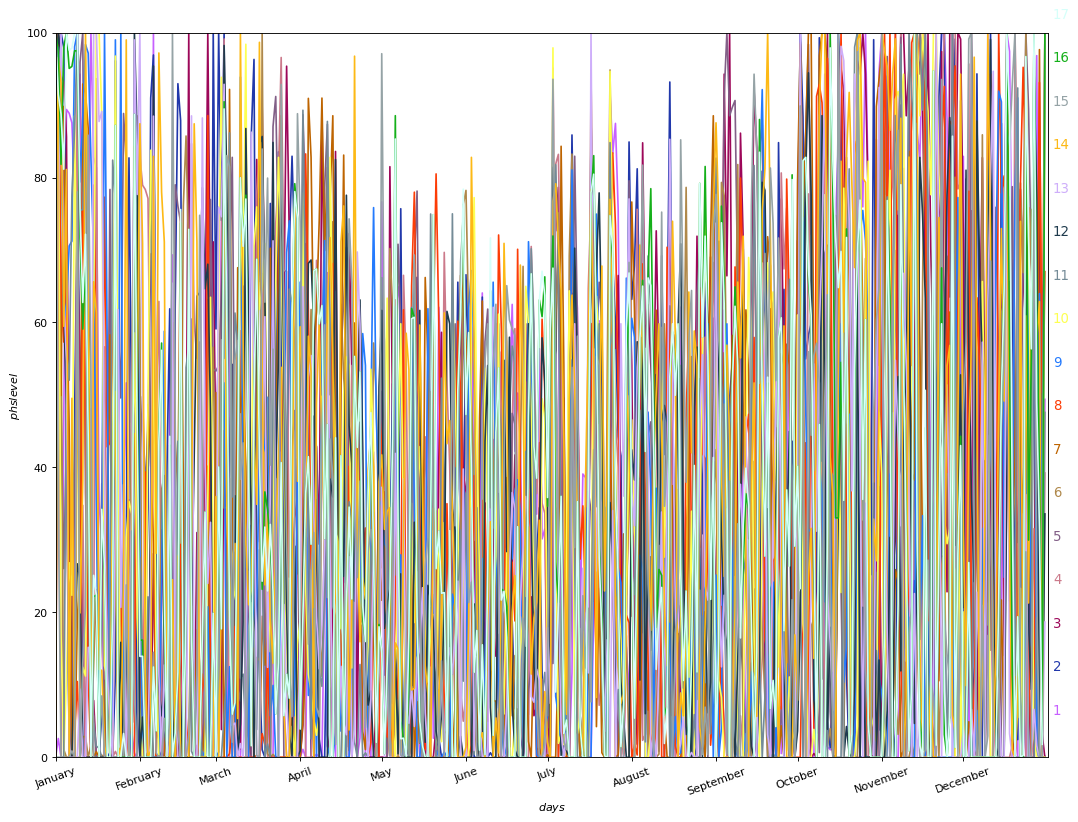

In [10]:
# Draw Plot dayly step
plt.figure(figsize=(16,12), dpi= 80)
for i in range(18):
    if i > 0:        
        plt.plot('days', 'Stored24phs', data=data.loc[data.index // 365 == i], color=mycolors[i])
        plt.text(367, 6*i, i, fontsize=12, color=mycolors[i])

plt.gca().set(xlim=(0, 365), ylim=(0, 100), ylabel='$phs level$', xlabel='$days$')

plt.xticks([0,31,31 +28, 2*31 +28, 2*31+28 + 30, 3*31 +30 + 28, 3*31+2*30 + 28,4*31+2*30 + 28,5*31+2*30 + 28, 5*31+3*30 + 28,6*31+3*30 + 28, 6*31+4*30 + 28], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
       rotation=20)  # Set text labels and properties.
plt.show()

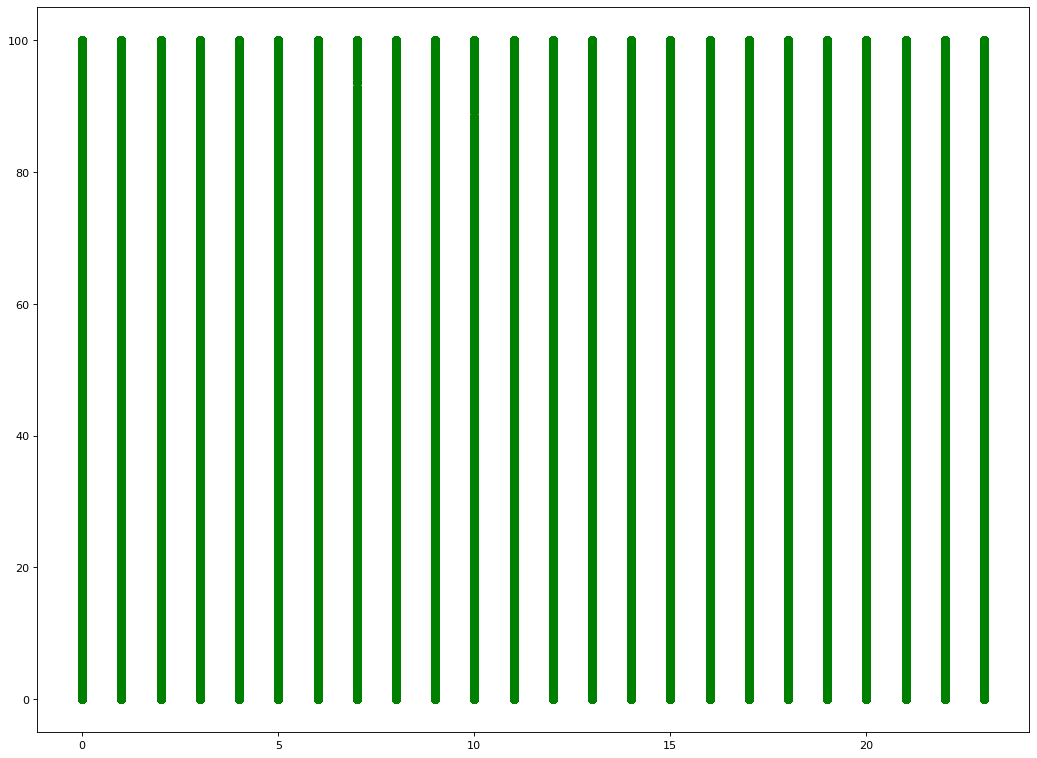

In [11]:
# Draw Plot dayly step
plt.figure(figsize=(16,12), dpi= 80)
for i in range(18):
    data_h2 = data_h[i * 24 * 365 : (1+i) * 24 * 365]
    plt.plot(data_h.index %24,data_h['Stored phs'], 'go' ) # , marker='gx')

plt.show()

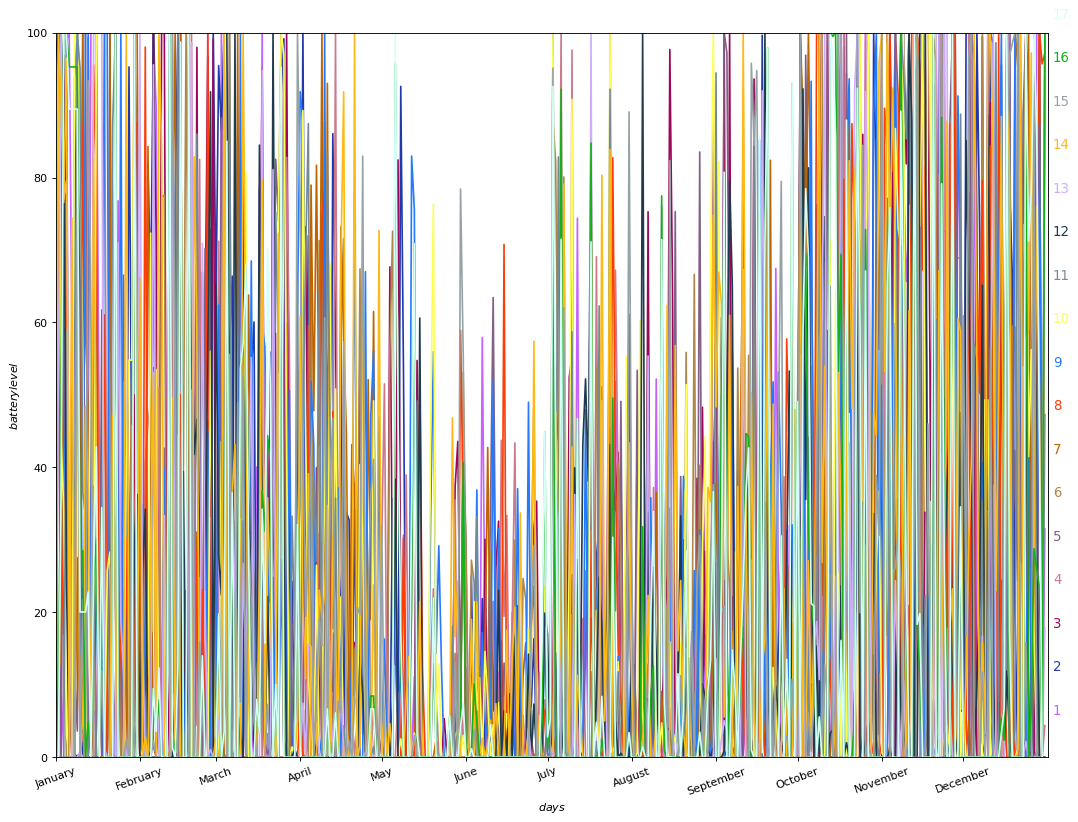

In [12]:
# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i in range(18):
    if i > 0:        
        plt.plot('days', 'Stored24battery', data=data.loc[data.index // 365 == i], color=mycolors[i])
        plt.text(367, 6*i, i, fontsize=12, color=mycolors[i])

plt.gca().set(xlim=(0, 365), ylim=(0, 100), ylabel='$battery level$', xlabel='$days$')

plt.xticks([0,31,31 +28, 2*31 +28, 2*31+28 + 30, 3*31 +30 + 28, 3*31+2*30 + 28,4*31+2*30 + 28,5*31+2*30 + 28, 5*31+3*30 + 28,6*31+3*30 + 28, 6*31+4*30 + 28], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
       rotation=20)  # Set text labels and properties.
plt.show()

We clearly observe a seasonal component in methanation storage.

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

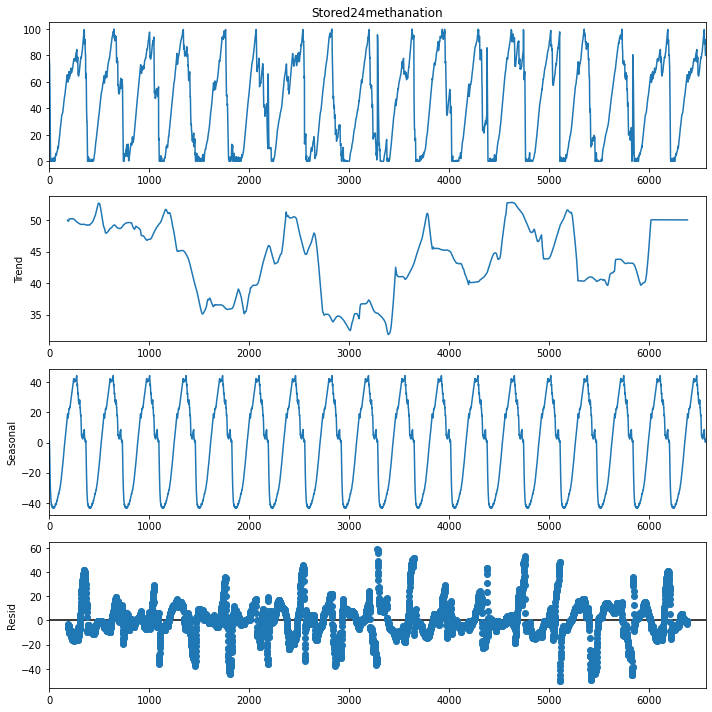

In [14]:
# Additive Decomposition
result_add = seasonal_decompose(data['Stored24methanation'], model='additive', period = 365)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot()
plt.show()

[0.00000000e+00 1.52230172e-04 3.04460344e-04 ... 4.99619425e-01
 4.99771655e-01 4.99923885e-01]
frequence :  0.0027401430963616986
period :  364.9444444444445


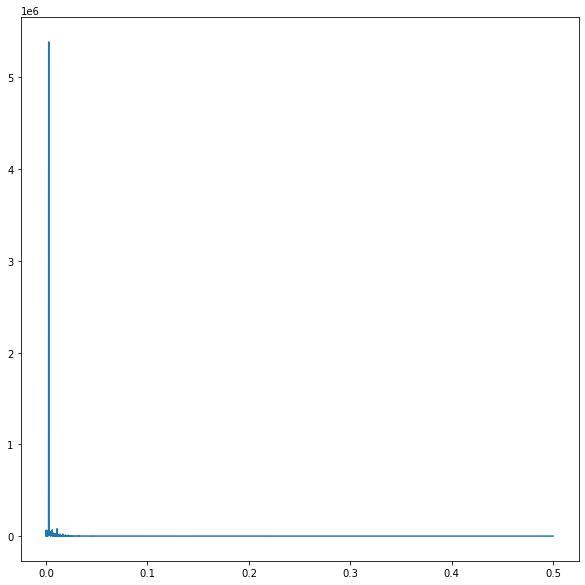

In [15]:
import scipy
f, pxx = scipy.signal.periodogram(data['Stored24methanation'])

plt.plot(f, pxx)
print (f)
freq_max = f[pxx.argmax()]
print('frequence : ', freq_max)
p = 1/freq_max
print('period : ' , p)
# Periode is 1 year.


In [20]:
#conda install rpy2

!pip install rpy2

In [25]:
import rpy2
from rpy2 import robjects
from rpy2.robjects.packages import importr
#import pandas.rpy.common as common
# imports the base module for R.
base = importr("base")
 
# imports the utils package for R.
utils = importr("utils")

stats = importr('stats')

In [35]:
#pip install pandas.rpy2
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri # install any dependency package if you get error like "module not found"
pandas2ri.activate()

from rpy2.robjects.conversion import localconverter

with localconverter(ro.default_converter + pandas2ri.converter):
       datar = data
print(datar)



      Electricity demand  production_nette  production stock   index  \
0                 822.34           -238.12            244.84       0   
1                1011.52           -230.66            253.92      24   
2                1429.34             40.22            114.61      48   
3                1476.76            -25.91            162.37      72   
4                1464.01           -233.79            284.44      96   
...                  ...               ...               ...     ...   
6564             1395.76            -70.92            124.39  157536   
6565             1387.42             13.67             90.03  157560   
6566             1421.66           -169.79            169.77  157584   
6567             1401.63           -178.55            254.32  157608   
6568             1360.12            -55.72            148.99  157632   

      Stored phs  Stored battery  Stored methanation days  cost_phs  cost_bat  \
0     100.000000      100.000000           80.483619  

In [39]:

with localconverter(ro.default_converter + pandas2ri.converter):
    t = data['days'].astype(float)
modmet = stats.lm('Stored24methanation ~ I(sin(2*3.14*days*freq_max)) + I(cos(2*3.14*days*freq_max))', data=datar)
base.summary(modmet) 


R[write to console]: Error in 2 * 3.14 * days : non-numeric argument to binary operator



RRuntimeError: Error in 2 * 3.14 * days : non-numeric argument to binary operator


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

t = data['days'].astype(int)
t = t.reshape(-1, 1)
y = np.sin(2*np.pi*t*freq_max)+np.cos(2*np.pi*t*freq_max)
lm = LinearRegression()
lm.fit(t, y)
lm.get_params()

In [ ]:
t_pred = (range(6569, 6700))
t_pred = np.reshape(t_pred, (1, -1))
y_pred = lm.predict(t_pred)

plt.plot(t[0,:],  data['Stored24methanation'])
plt.plot(t_pred[0,:], y_pred[0,:])
plt.ylabel('np.sin(2*pi*year/15)+np.cos(2*pi*year/15)')
plt.show()

In [ ]:

y_pred = lm.predict(year_predict)

plt.plot(year[0,:], y[0,:])
plt.plot(year_predict[0,:], y_pred[0,:])
plt.ylabel('np.sin(2*pi*year/15)+np.cos(2*pi*year/15)')
plt.show()

In [ ]:
import numpy as np

def harmonic_regression(x, y, frequency):
    # Compute the harmonic model
    y_hat = harmonic_regression(x, y, frequency) + np.cos(2 * np.pi * 1/365 * x) - np.sin(2 * np.pi * 1/365 * x)
    # Return the harmonic model
    return y_hat, np.mean(y)

# Test the harmonic regression function
x = data['days'].astype(int)
y = data['Stored24methanation'].astype(int)
frequency = freq_max
plt.plot(x,  harmonic_regression(x, y, frequency)[0])
print(harmonic_regression(x, y, frequency)) 

In [57]:
import statsmodels.api as sm
import numpy as np

# Generate some sample data with a periodic pattern
np.random.seed(0)
n = 100
x = data.days.astype(float)
frequency = freq_max
y = data.Stored24methanation.astype(float) #data.Stored24methanation.astype(float).mean() + np.cos(2 * np.pi * frequency * x) + np.sin(2 * np.pi * frequency * x)

# Add a column of ones to x to allow for an intercept term
X = sm.add_constant(x)

# Fit a harmonic regression model
harm_model = sm.OLS(y, X).fit()

# Print the model summary
print(harm_model.summary())


                             OLS Regression Results                            
Dep. Variable:     Stored24methanation   R-squared:                       0.485
Model:                             OLS   Adj. R-squared:                  0.485
Method:                  Least Squares   F-statistic:                     6190.
Date:                 Sat, 31 Dec 2022   Prob (F-statistic):               0.00
Time:                         17:17:40   Log-Likelihood:                -30082.
No. Observations:                 6569   AIC:                         6.017e+04
Df Residuals:                     6567   BIC:                         6.018e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4757      0.583      7.67

C:\Users\flavi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


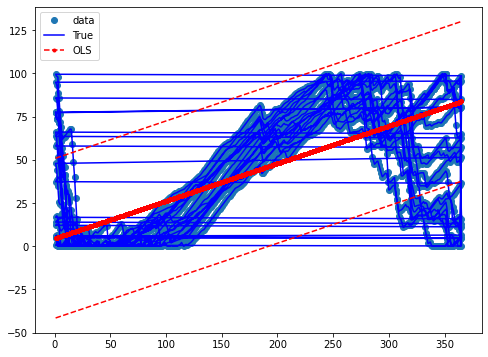

In [58]:
pred_ols = harm_model.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "o", label="data")
ax.plot(x, data.Stored24methanation.astype(float) , "b-", label="True")
ax.plot(x, harm_model.fittedvalues, "r--.", label="OLS")
ax.plot(x, iv_u, "r--")
ax.plot(x, iv_l, "r--")
ax.legend(loc="best")

In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn

In [49]:
from sklearn.linear_model import HarmonicRegression

# Fit a harmonic regression model
harm_model2 = HarmonicRegression(period=freq_max).fit(x.reshape(-1, 1), y)

# Print the model coefficients
print(harm_model2.coef_)


ImportError: cannot import name 'HarmonicRegression' from 'sklearn.linear_model' (C:\Users\flavi\anaconda3\lib\site-packages\sklearn\linear_model\__init__.py)

Make the series stationary to predict : difference method : 
stock_day_methanation is the diff

In [ ]:

plot_df(data, x=data.index/364, y=data['2diff'], title='Methanation stock level by year')
# does no look stationnary
#probleme on join years

In [ ]:
# suppression des jours 365 et 364 car non continuité des années
data.drop(data[data.days == '365'].index, axis = 0, inplace = True)
data.drop(data[data.days == '364'].index, axis = 0, inplace = True)
plot_df(data, x=data.index/364, y=data['2diff'], title='Methanation stock level by year')
# does no look stationnary
#probleme on join years

In [ ]:
#try the log

plot_df(data, x=data.index/364, y=data.Stored24methanation, title='Methanation stock level by year') 